In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load datasets
train_df = pd.read_csv("C:\\Users\\jishn\\OneDrive\\Desktop\\mnist_test.csv")
test_df = pd.read_csv("C:\\Users\\jishn\\OneDrive\\Desktop\\mnist_train.csv")

# Split into images and labels
X_train = train_df.iloc[:, 1:].values / 255.0  # Normalize pixel values
y_train = train_df.iloc[:, 0].values

X_test = test_df.iloc[:, 1:].values / 255.0
y_test = test_df.iloc[:, 0].values

# Reshape for the model: (num_samples, 28, 28)
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\jishn\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.fit(X_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6402 - loss: 1.1925 - val_accuracy: 0.9260 - val_loss: 0.2482
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9219 - loss: 0.2756 - val_accuracy: 0.9420 - val_loss: 0.2020
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9435 - loss: 0.1989 - val_accuracy: 0.9470 - val_loss: 0.1791
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9571 - loss: 0.1436 - val_accuracy: 0.9540 - val_loss: 0.1590
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9723 - loss: 0.1014 - val_accuracy: 0.9595 - val_loss: 0.1357
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9793 - loss: 0.0772 - val_accuracy: 0.9585 - val_loss: 0.1383
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9853 - loss: 0.0559 - val_accuracy: 0.9520 - val_loss: 0.1755
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9890 - loss: 0.0475 - val_accuracy: 0.

In [8]:
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy:.4f}")


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9475 - loss: 0.1979
Test Accuracy: 0.9469


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


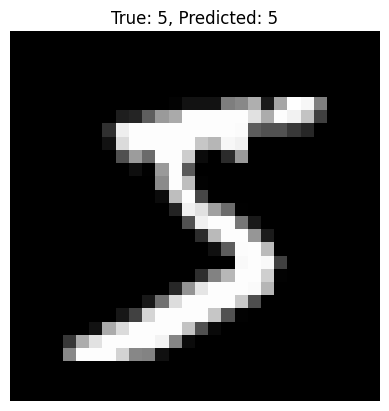

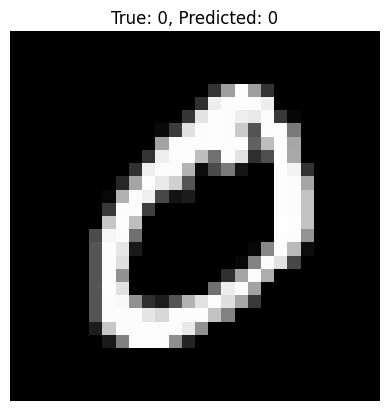

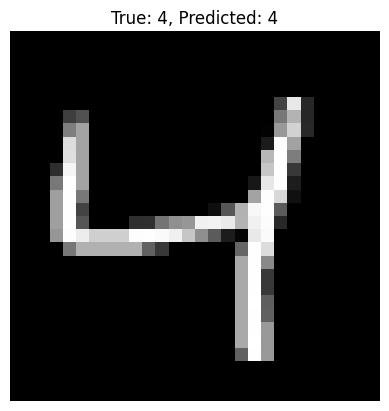

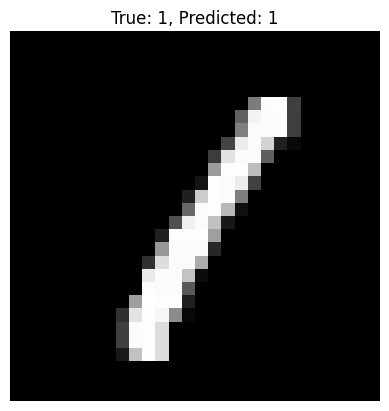

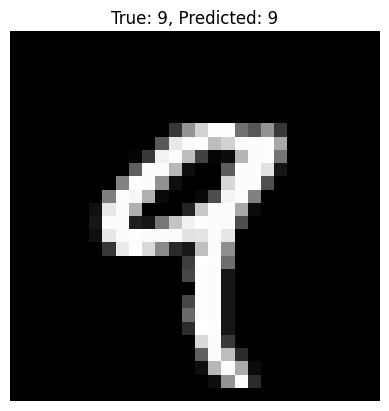

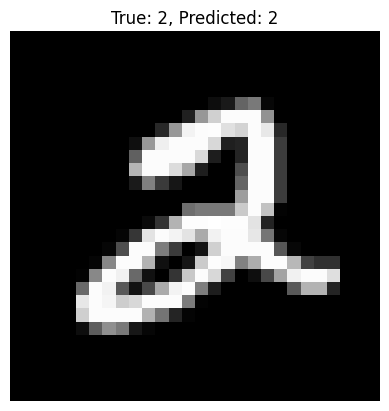

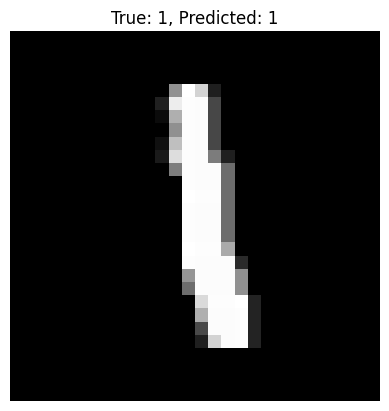

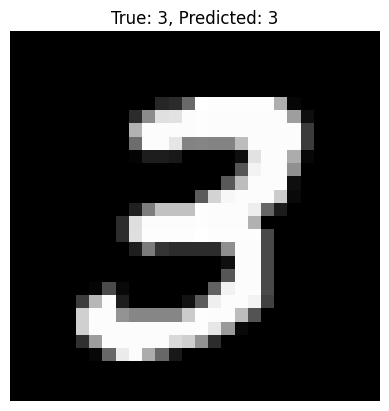

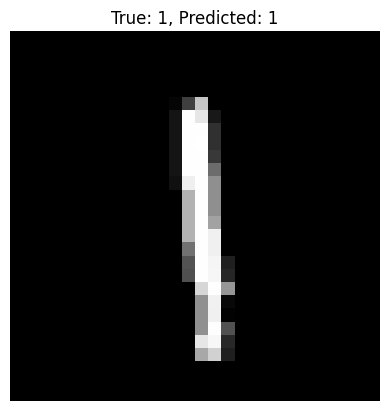

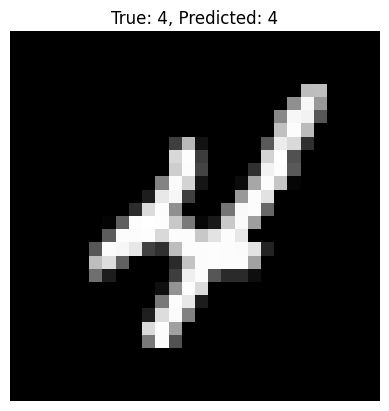

In [9]:
# Predict on some test images
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Plot 10 test images with predictions
for i in range(10):
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}, Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tkinter import *
from PIL import Image, ImageDraw, ImageOps

# Load the trained model (make sure you've trained and saved it earlier)
model = load_model('mnist_model.h5')  # Save model using model.save('mnist_model.h5')

# GUI setup
class App:
    def __init__(self, master):
        self.master = master
        self.master.title("Draw a digit (0-9)")
        
        self.canvas = Canvas(self.master, width=200, height=200, bg='white')
        self.canvas.pack()

        self.image = Image.new("L", (200, 200), 'white')
        self.draw = ImageDraw.Draw(self.image)

        self.canvas.bind("<B1-Motion>", self.paint)

        self.predict_button = Button(self.master, text="Predict", command=self.predict_digit)
        self.predict_button.pack()

        self.clear_button = Button(self.master, text="Clear", command=self.clear_canvas)
        self.clear_button.pack()

        self.label = Label(self.master, text="", font=("Helvetica", 24))
        self.label.pack()

    def paint(self, event):
        x1, y1 = (event.x - 8), (event.y - 8)
        x2, y2 = (event.x + 8), (event.y + 8)
        self.canvas.create_oval(x1, y1, x2, y2, fill='black')
        self.draw.ellipse([x1, y1, x2, y2], fill='black')

    def clear_canvas(self):
        self.canvas.delete("all")
        self.draw.rectangle([0, 0, 200, 200], fill='white')
        self.label.config(text="")

    def predict_digit(self):
        img = self.image.resize((28, 28))
        img = ImageOps.invert(img)
        img_array = np.array(img) / 255.0
        img_array = img_array.reshape(1, 28, 28)

        prediction = model.predict(img_array)
        predicted_label = np.argmax(prediction)
        self.label.config(text=f"Prediction: {predicted_label}")

# Run GUI
root = Tk()
app = App(root)
root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
